In [117]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Problem 1. Predicting SalePrice using GrLivArea


In [118]:
#import dataset
data = pd.read_csv("train.csv")
area = pd.DataFrame(data['GrLivArea']) #Predictor
saleprice = pd.DataFrame(data['SalePrice']) #Response

### Uni-Variate Linear Regression 
We will start by setting up a Uni-Variate Linear Regression 

Response Variable : SalePrice
<br> 
Predictor Feature : GrLivArea 

Set up the regression problem with Train and Test datasets.   
Split the "SalePrice" & "GrLivArea" train and test sets randomly and perform linear Regression


In [119]:
# import essential functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_area, test_area, train_saleprice, test_saleprice = train_test_split(area, saleprice, test_size = 0.2)
# Check the sample sizes
print("Train Set :", train_area.shape,train_saleprice.shape)
print("Test Set  :", test_area.shape, test_saleprice.shape)


Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


Intercept of Regression:	: b =  [3036.95390932]
Coefficients of Regression:	: a =  [[117.80537026]]

Goodness of Fit of Model	: Train Dataset
Explained Variance (R^2) 	: 0.5510160245846198
Mean Squared Error (MSE) 	: 2882218413.0688953

Goodness of Fit of Model	: Test Dataset
Explained Variance (R^2) 	: 0.26055626351955596
Mean Squared Error (MSE) 	: 4329651072.9508095



Text(0, 0.5, 'SalePrice')

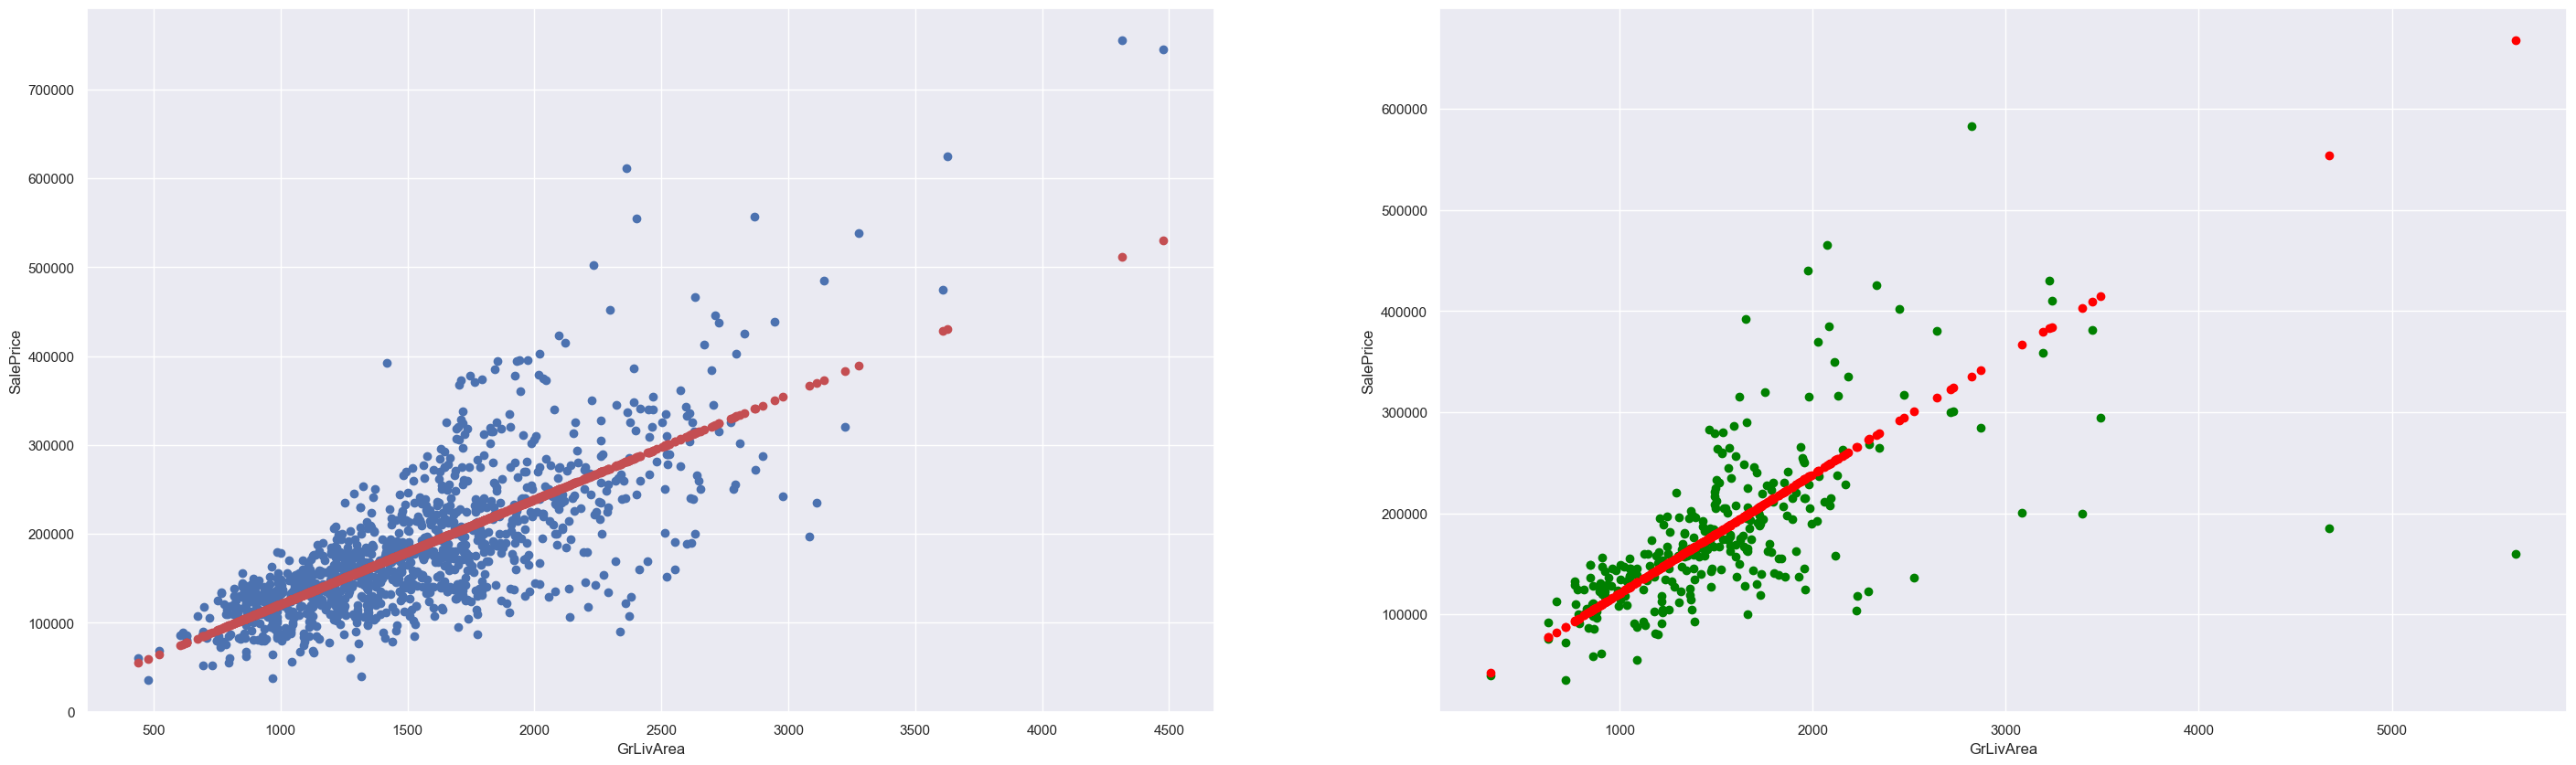

In [123]:
# Linear Regression using Train Data
linreg = LinearRegression() # Create a Linear Regression object
linreg.fit(train_area, train_saleprice) # Train the Linear Regression model

# Mean Square Error (MSE) function
def mse_function(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

# Coefficients of the Linear Regression line
print('Intercept of Regression:\t: b = ', linreg.intercept_)
print('Coefficients of Regression:\t: a = ', linreg.coef_)
print()

# Predict Saleprice values corresponding to GrLivArea
saleprice_train_pred = linreg.predict(train_area)
saleprice_test_pred = linreg.predict(test_area)

# Explaioned Variance(R^2) & Mean Square Error <- train set
print("Goodness of Fit of Model\t: Train Dataset")
print("Explained Variance (R^2) \t:", linreg.score(train_area,train_saleprice))
print("Mean Squared Error (MSE) \t:", mse_function(train_saleprice, saleprice_train_pred))
#print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse_function(train_saleprice, saleprice_train_pred)))
print()

# Explaioned Variance(R^2) & Mean Square Error <- test set
print("Goodness of Fit of Model\t: Test Dataset")
print("Explained Variance (R^2) \t:", linreg.score(test_area,test_saleprice))
print("Mean Squared Error (MSE) \t:", mse_function(test_saleprice, saleprice_test_pred))
#print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse_function(test_saleprice, saleprice_test_pred)))
print()


# Plot the Linear Regression Line
f , axes = plt.subplots(1,2, figsize=(35,10))
#
axes[0].scatter(train_area, train_saleprice)
axes[0].scatter(train_area, saleprice_train_pred, color = "r")
axes[0].set_xlabel("GrLivArea")
axes[0].set_ylabel("SalePrice")

# Plot the Predictions
axes[1].scatter(test_area, test_saleprice,color = "green")
axes[1].scatter(test_area, saleprice_test_pred, color = "red")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlabel("GrLivArea")
axes[1].set_ylabel("SalePrice")
